# Readme
lets try to check the output from the flexpart running
- make sure the run is finished for all 
- check if there are any Diego comments


In [52]:
from useful_scit.imps import (
    pd,np,xr,za,mpl,plt,sns, pjoin, 
    os,glob,dt,sys,ucp,log, splot, crt,axsplot)
import re

In [2]:
path_flx = '/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-09-25_15-25-01_'

In [6]:
files = glob.glob(pjoin(path_flx,'*-*-*/output*.txt'))
files.sort()

In [24]:
PATH = 'PATH'
NAME = 'NAME'
DATE = 'DATE'
NPDATE = 'NPDATE'

In [9]:
df_files = pd.DataFrame(files,columns=[PATH])

In [22]:
df_files[NAME]=df_files.apply(lambda r: os.path.basename(os.path.dirname(r[PATH])), axis=1)
df_files[DATE]=pd.to_datetime(df_files[NAME])
df_files = df_files.set_index(DATE)

In [31]:
n_per_date = df_files.groupby(DATE).count()[NAME]
n_per_date.name = NPDATE
df_files = df_files.join(n_per_date)

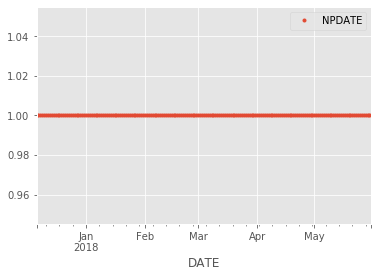

In [36]:
df_files.reset_index().plot(DATE,NPDATE,style='.')

In [144]:
DIEGO_WARN = 'DIEGO_WARN'
DIEGO_WARN_PPLEV = 'DIEGO_WARN_PPLEV'
DONE = 'DONE'

In [143]:
def _check_diego_warning(row):
    with open(row[PATH],'r') as f:
        txt = f.read()
    res = re.findall('(?!Diego: pplev)Diego.+',txt)
    return len(res)

def _check_diego_warningPP(row):
    with open(row[PATH],'r') as f:
        txt = f.read()
    res = re.findall('Diego: pplev',txt)
    return len(res)

def _check_done(row):
    with open(row[PATH],'r') as f:
        txt = f.read()
    res = re.findall('CONGRATULATIONS: YOU HAVE SUCCESSFULLY COMPLETED A FLEXPART_WRF MODEL RUN!',txt)
    return len(res)

In [120]:
df_files[DIEGO_WARN]=df_files.apply(lambda r: _check_diego_warning(r), axis=1)

In [129]:
df_files[DIEGO_WARN_PPLEV]=df_files.apply(lambda r: _check_diego_warningPP(r), axis=1)

In [145]:
df_files[DONE]=df_files.apply(lambda r: _check_done(r), axis=1)

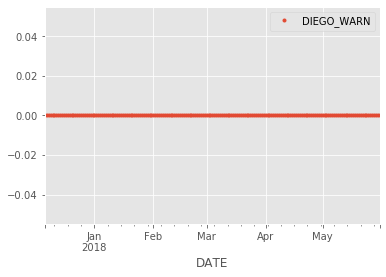

In [130]:
df_files.reset_index().plot(DATE,DIEGO_WARN,style='.')

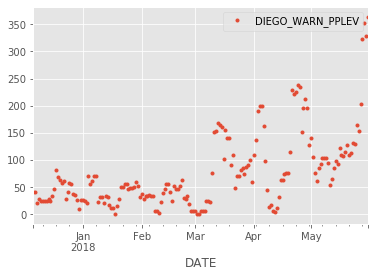

In [131]:
df_files.reset_index().plot(DATE,DIEGO_WARN_PPLEV,style='.')

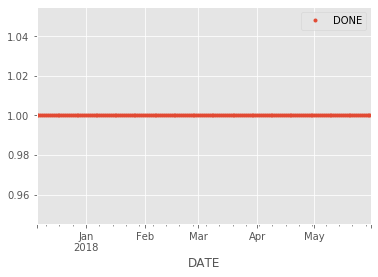

In [148]:
df_files.reset_index().plot(DATE,DONE,style='.')

In [149]:
!conda env list

# conda environments:
#
                         /homeappl/home/aliagadi/appl_taito/miniconda3
base                     /homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36
                         /homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36_sinteracitve
                      *  /homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36backup
                         /wrk/aliagadi/DONOTREMOVE/geoconda3_env/jup

